In [1]:
# setup python
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from cvxpy import *

In [2]:
# plot properties
# use to create figures for tex
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)

In [3]:
# generate data for simple exponential model
np.random.seed(102)
n_exp = 15
m_exp = 0.4
b_exp = 0.15
s_exp = 3
x_exp = np.linspace(0,4,n_exp)
y_exp = m_exp*np.exp(x_exp) + b_exp + s_exp*np.random.standard_normal(x_exp.shape)
exp_range = [x_exp.min()-.1,
            x_exp.max()+.1,
             y_exp.min()-1,
            y_exp.max()+1]

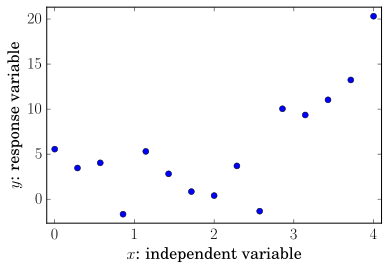

In [4]:
plt.figure()
plt.plot(x_exp,y_exp,'o')
plt.xlabel('$x$: independent variable')
plt.ylabel('$y$: response variable')
plt.axis(exp_range)
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('fig/exp-fit-1.pdf')

In [5]:
def linear_model(x,y):
    m = Variable()
    b = Variable()
    objective = Minimize(sum_squares(m*x + b - y))
    prob = Problem(objective)
    result = prob.solve()
    return (m.value,b.value)

def exp_model(x,y):
    m = Variable()
    b = Variable()
    objective = Minimize(sum_squares(m*np.exp(x) + b - y))
    prob = Problem(objective)
    result = prob.solve()
    return (m.value,b.value)

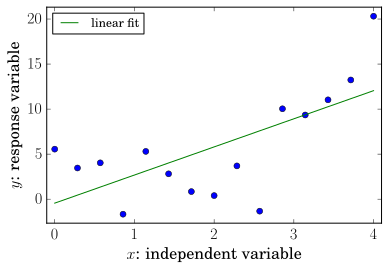

In [6]:
# fit the model
(m_lin,b_lin) = linear_model(x_exp,y_exp)
(m_fit,b_fit) = exp_model(x_exp,y_exp)

# compute model output
y_lin = m_lin*x_exp + b_lin
y_fit = m_fit*np.exp(x_exp) + b_fit
y_true = m_exp*np.exp(x_exp) + b_exp

# plot linear
plt.figure()
plt.plot(x_exp,y_exp,'o')
plt.plot(x_exp,y_lin,label='linear fit')
plt.xlabel('$x$: independent variable')
plt.ylabel('$y$: response variable')
plt.legend(loc=2,fontsize=12)
plt.axis(exp_range)
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('fig/exp-fit-2.pdf')

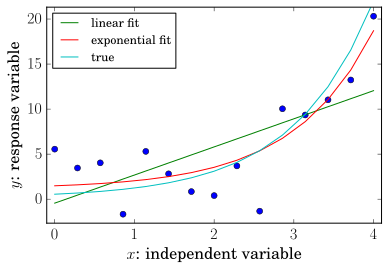

In [7]:
# plot all
plt.figure()
plt.plot(x_exp,y_exp,'o')
plt.plot(x_exp,y_lin,label='linear fit')
plt.plot(x_exp,y_fit,label='exponential fit')
plt.plot(x_exp,y_true,label='true')
plt.xlabel('$x$: independent variable')
plt.ylabel('$y$: response variable')
plt.legend(loc=2,fontsize=12)
plt.axis(exp_range)
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('fig/exp-fit-3.pdf')